# Analyzing Police Activity with pandas

## Data Cleaning

### Data Import

In [77]:
import pandas as pd
import io
import requests
url="https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv"
s=requests.get(url).content
police_traffic_stops=pd.read_csv(io.StringIO(s.decode('utf-8')))
url="https://assets.datacamp.com/production/repositories/1497/datasets/02f3fb2d4416d3f6626e1117688e0386784e8e55/weather.csv"
s=requests.get(url).content
weather=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [78]:
police_traffic_stops.head(3)

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [79]:
weather.head(3)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN
2,USW00014765,2005-01-03,49.0,44,53,6.93,17.0,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


### Examining the dataset + Dropping NaN's

In [80]:
(police_traffic_stops.isnull().sum() / police_traffic_stops.shape[0])*100

state                   0.000000
stop_date               0.000000
stop_time               0.000000
county_name           100.000000
driver_gender           5.673581
driver_race             5.670311
violation_raw           5.670311
violation               5.670311
search_conducted        0.000000
search_type            96.395287
stop_outcome            5.670311
is_arrested             5.670311
stop_duration           5.670311
drugs_related_stop      0.000000
district                0.000000
dtype: float64

All Stops took place in a single state, thus drop 'states' column

In [81]:
police_traffic_stops.drop(['county_name', 'state'], axis='columns', inplace=True)

In [82]:
(police_traffic_stops.isnull().sum() / police_traffic_stops.shape[0])*100

stop_date              0.000000
stop_time              0.000000
driver_gender          5.673581
driver_race            5.670311
violation_raw          5.670311
violation              5.670311
search_conducted       0.000000
search_type           96.395287
stop_outcome           5.670311
is_arrested            5.670311
stop_duration          5.670311
drugs_related_stop     0.000000
district               0.000000
dtype: float64

<b> NOTE </b> : driver_gender column will be critical to many of your analyses. Because only a small fraction of rows are missing driver_gender, we'll drop those rows from the dataset.

In [83]:
police_traffic_stops.dropna(subset=['driver_gender'], inplace=True)

In [84]:
(police_traffic_stops.isnull().sum() / police_traffic_stops.shape[0])*100

stop_date              0.000000
stop_time              0.000000
driver_gender          0.000000
driver_race            0.000000
violation_raw          0.000000
violation              0.000000
search_conducted       0.000000
search_type           96.178469
stop_outcome           0.000000
is_arrested            0.000000
stop_duration          0.000000
drugs_related_stop     0.000000
district               0.000000
dtype: float64

In [85]:
(weather.isnull().sum() / weather.shape[0])*100

STATION     0.000000
DATE        0.000000
TAVG       69.703759
TMIN        0.000000
TMAX        0.000000
AWND        0.000000
WSF2        0.000000
WT01       56.011949
WT02       94.498382
WT03       94.423699
WT04       97.087379
WT05       91.038088
WT06       99.377645
WT07       98.033358
WT08       89.942743
WT09       98.282300
WT10       99.950212
WT11       99.975106
WT13       70.749315
WT14       85.685835
WT15       99.850635
WT16       66.990291
WT17       99.701270
WT18       91.411501
WT19       99.900423
WT21       99.551904
WT22       99.203386
dtype: float64

### DataTypes

In [86]:
police_traffic_stops.head(1)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4


<b> Concatenating Two COlumns </b>

In [87]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = police_traffic_stops['stop_date'].str.cat(police_traffic_stops['stop_time'], sep=' ')
# Convert 'combined' to datetime format
police_traffic_stops['stop_datetime'] = pd.to_datetime(combined)

In [88]:
police_traffic_stops.set_index('stop_datetime', inplace=True)

In [89]:
police_traffic_stops.dtypes

stop_date             object
stop_time             object
driver_gender         object
driver_race           object
violation_raw         object
violation             object
search_conducted        bool
search_type           object
stop_outcome          object
is_arrested           object
stop_duration         object
drugs_related_stop      bool
district              object
dtype: object

In [90]:
police_traffic_stops['is_arrested'] = police_traffic_stops.is_arrested.astype('bool')

In [91]:
police_traffic_stops.head(1)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [92]:
weather.head(1)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
weather.dtypes

STATION     object
DATE        object
TAVG       float64
TMIN         int64
TMAX         int64
AWND       float64
WSF2       float64
WT01       float64
WT02       float64
WT03       float64
WT04       float64
WT05       float64
WT06       float64
WT07       float64
WT08       float64
WT09       float64
WT10       float64
WT11       float64
WT13       float64
WT14       float64
WT15       float64
WT16       float64
WT17       float64
WT18       float64
WT19       float64
WT21       float64
WT22       float64
dtype: object

## Analysis

### Exploring the relationship between gender and policing

#### Comparing Male vs Females Number of Violations 

In [94]:
police_traffic_stops.head(1)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4


In [98]:
police_traffic_stops.violation.value_counts(normalize=True)

Speeding               0.559571
Moving violation       0.187483
Equipment              0.126202
Other                  0.050950
Registration/plates    0.042791
Seat belt              0.033004
Name: violation, dtype: float64

In [105]:
# Create a DataFrame of female drivers
female = police_traffic_stops[police_traffic_stops.driver_gender == 'F']
# Create a DataFrame of male drivers
male = police_traffic_stops[police_traffic_stops.driver_gender == 'M']

In [107]:
print(female.violation.value_counts(normalize=True))
print("*******************************************")
print(male.violation.value_counts(normalize=True))

Speeding               0.658114
Moving violation       0.138218
Equipment              0.105199
Registration/plates    0.044418
Other                  0.029738
Seat belt              0.024312
Name: violation, dtype: float64
*******************************************
Speeding               0.522243
Moving violation       0.206144
Equipment              0.134158
Other                  0.058985
Registration/plates    0.042175
Seat belt              0.036296
Name: violation, dtype: float64


#### Does gender affect who gets a ticket for speeding?

In [108]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = police_traffic_stops[(police_traffic_stops.driver_gender == 'F') & (police_traffic_stops.violation == 'Speeding')]
# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = police_traffic_stops[(police_traffic_stops.driver_gender == 'M') & (police_traffic_stops.violation == 'Speeding')]


In [109]:
# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts(normalize=True))
print("*******************************************")
# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize=True))

Citation            0.952192
Warning             0.040074
Arrest Driver       0.005752
N/D                 0.000959
Arrest Passenger    0.000639
No Action           0.000383
Name: stop_outcome, dtype: float64
*******************************************
Citation            0.944595
Warning             0.036184
Arrest Driver       0.015895
Arrest Passenger    0.001281
No Action           0.001068
N/D                 0.000976
Name: stop_outcome, dtype: float64


The numbers are similar for males and females: about 95% of stops for speeding result in a ticket. Thus, the data fails to show that gender has an impact on who gets a ticket for speeding.

####  Search rates by gender

In [111]:
# Check the data type of 'search_conducted'
print(police_traffic_stops.search_conducted.dtype)

# Calculate the search rate by counting the values
print(police_traffic_stops.search_conducted.value_counts(normalize=True))

# Calculate the search rate by taking the mean
print(police_traffic_stops.search_conducted.mean())

bool
False    0.961785
True     0.038215
Name: search_conducted, dtype: float64
0.0382153092354627


- It looks like the search rate is about 3.8%. 

In [113]:
# Calculate the search rate for female drivers
print(police_traffic_stops[police_traffic_stops.driver_gender == 'F'].search_conducted.mean())

0.019180617481282074


In [114]:
# Calculate the search rate for female drivers
print(police_traffic_stops[police_traffic_stops.driver_gender == 'M'].search_conducted.mean())

0.04542557598546892


In [115]:
# Calculate the search rate for both groups simultaneously
print(police_traffic_stops.groupby('driver_gender').search_conducted.mean())

driver_gender
F    0.019181
M    0.045426
Name: search_conducted, dtype: float64


In [116]:
# Calculate the search rate for each combination of gender and violation
police_traffic_stops.groupby(['driver_gender', 'violation']).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.039984
               Moving violation       0.039257
               Other                  0.041018
               Registration/plates    0.054924
               Seat belt              0.017301
               Speeding               0.008309
M              Equipment              0.071496
               Moving violation       0.061524
               Other                  0.046191
               Registration/plates    0.108802
               Seat belt              0.035119
               Speeding               0.027885
Name: search_conducted, dtype: float64

In [120]:
# Reverse the ordering to group by violation before gender
police_traffic_stops.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.039984
                     M                0.071496
Moving violation     F                0.039257
                     M                0.061524
Other                F                0.041018
                     M                0.046191
Registration/plates  F                0.054924
                     M                0.108802
Seat belt            F                0.017301
                     M                0.035119
Speeding             F                0.008309
                     M                0.027885
Name: search_conducted, dtype: float64

#### Does gender affect who is frisked during a search?


In [123]:
# Count the 'search_type' values
print(police_traffic_stops.search_type.value_counts())

Incident to Arrest                                          1290
Probable Cause                                               924
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 123
Incident to Arrest,Probable Cause                            100
Probable Cause,Reasonable Suspicion                           54
Incident to Arrest,Inventory,Probable Cause                   35
Probable Cause,Protective Frisk                               35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [ ]:
# Check if 'search_type' contains the string 'Protective Frisk'
police_traffic_stops['frisk'] = police_traffic_stops.search_type.str.contains('Protective Frisk', na=False)

 na= False returns False if NaN value is observed

In [122]:
# Check the data type of 'frisk'
print(police_traffic_stops.frisk.dtype)
# Take the sum of 'frisk'
print(police_traffic_stops.frisk.sum())

bool
303


In [124]:
# Create a DataFrame of stops in which a search was conducted
searched = police_traffic_stops[police_traffic_stops.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.09162382824312065
driver_gender
F    0.074561
M    0.094353
Name: frisk, dtype: float64


 The frisk rate is higher for males than for females, though we can't conclude that this difference is caused by the driver's gender.

### Visual exploratory data analysis

#### Does time of day affect arrest rate?


In [126]:
# Calculate the overall arrest rate
print(police_traffic_stops.is_arrested.mean())

0.0355690117407784


In [127]:
# Calculate the hourly arrest rate
print(police_traffic_stops.groupby(police_traffic_stops.index.hour).is_arrested.mean())

stop_datetime
0     0.051431
1     0.064932
2     0.060798
3     0.060549
4     0.048000
5     0.042781
6     0.013813
7     0.013032
8     0.021854
9     0.025206
10    0.028213
11    0.028897
12    0.037399
13    0.030776
14    0.030605
15    0.030679
16    0.035281
17    0.040619
18    0.038204
19    0.032245
20    0.038107
21    0.064541
22    0.048666
23    0.047592
Name: is_arrested, dtype: float64


In [128]:
# Save the hourly arrest rate
hourly_arrest_rate = police_traffic_stops.groupby(police_traffic_stops.index.hour).is_arrested.mean()

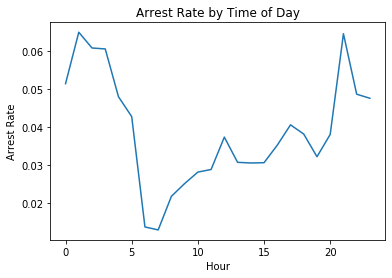

In [129]:
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()
# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')
# Display the plot
plt.show()

#### Are drug-related stops on the rise?


In [130]:
# Calculate the annual rate of drug-related stops
print(police_traffic_stops.drugs_related_stop.resample('A').mean())

stop_datetime
2005-12-31    0.006501
2006-12-31    0.007258
2007-12-31    0.007970
2008-12-31    0.007505
2009-12-31    0.009889
2010-12-31    0.010081
2011-12-31    0.009731
2012-12-31    0.009921
2013-12-31    0.013094
2014-12-31    0.013826
2015-12-31    0.012266
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


In [132]:
# Save the annual rate of drug-related stops
annual_drug_rate = police_traffic_stops.drugs_related_stop.resample('A').mean()

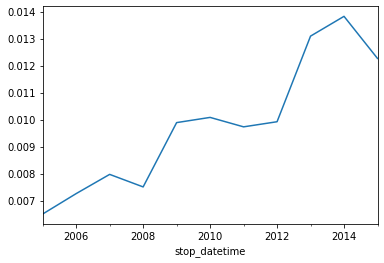

In [133]:
# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

In [135]:
# Calculate and save the annual search rate
annual_search_rate = police_traffic_stops.search_conducted.resample('A').mean()

In [136]:
# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

In [138]:
annual.head(3)

,drugs_related_stop,search_conducted
stop_datetime,,
2005-12-31,0.006501,0.049167
2006-12-31,0.007258,0.041758
2007-12-31,0.007970,0.044056


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018D0E99EB88>,
      dtype=object)

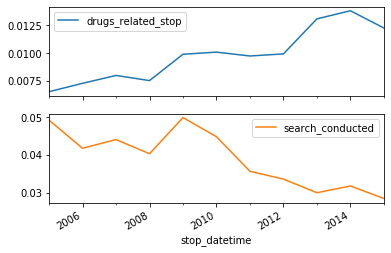

In [137]:
# Create subplots from 'annual'
annual.plot(subplots=True)


- The rate of drug-related stops increased even though the search rate decreased

#### What violations are caught in each district?


<b> Cross-Tab </b> :  <br>
input = 2 pandas series(categorical) <br>
output = Frequency Table  (Tally of how many times each combination of values occur)

In [141]:
police_traffic_stops.head(2)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False


In [140]:
# Create a frequency table of districts and violations
pd.crosstab(police_traffic_stops.district, police_traffic_stops.violation)

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322
Zone X1,296,671,143,38,74,1119
Zone X3,2049,3086,769,671,820,8779
Zone X4,3541,5353,1560,1411,843,9795


<b> Selecting K  Zones :</b>

In [142]:
# Save the frequency table as 'all_zones'
all_zones = pd.crosstab(police_traffic_stops.district, police_traffic_stops.violation)

In [145]:
# Select rows 'Zone K1' through 'Zone K3'
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,672,1254,290,120,0,5960
Zone K2,2061,2962,942,768,481,10448
Zone K3,2302,2898,705,695,638,12322


In [146]:
# Save the smaller table as 'k_zones'
k_zones = all_zones.loc['Zone K1':'Zone K3']

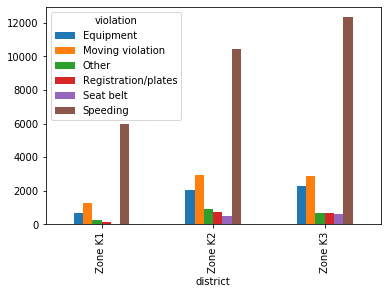

In [144]:
# Create a bar plot of 'k_zones'
k_zones.plot(kind='bar')

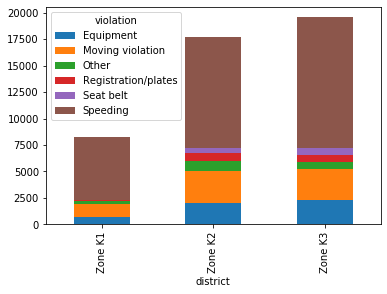

In [147]:
# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind='bar', stacked=True)

The vast majority of traffic stops in Zone K1 are for speeding, and Zones K2 and K3 are remarkably similar to one another in terms of violations

#### How long might you be stopped for a violation?


In [149]:
police_traffic_stops.head(2)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False


Converting stop durations to numbers

In this exercise, you'll convert the stop durations to integers. Because the precise durations are not available, you'll have to estimate the numbers using reasonable values:<br><br><br>

Convert '0-15 Min' to 8 <br>
Convert '16-30 Min' to 23<br>
Convert '30+ Min' to 45

<b> .map(Mapping_Dictionary) </b> method

In [150]:
# Print the unique values in 'stop_duration'
police_traffic_stops.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min'], dtype=object)

In [151]:
# Create a dictionary that maps strings to integers
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

# Convert the 'stop_duration' strings to integers using the 'mapping'
police_traffic_stops['stop_minutes'] = police_traffic_stops.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(police_traffic_stops.stop_minutes.unique())

[ 8 23 45]


In [152]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(police_traffic_stops.groupby('violation_raw').stop_minutes.mean())

violation_raw
APB                                 17.967033
Call for Service                    22.124371
Equipment/Inspection Violation      11.445655
Motorist Assist/Courtesy            17.741463
Other Traffic Violation             13.844490
Registration Violation              13.736970
Seatbelt Violation                   9.662815
Special Detail/Directed Patrol      15.123632
Speeding                            10.581562
Suspicious Person                   14.910714
Violation of City/Town Ordinance    13.254144
Warrant                             24.055556
Name: stop_minutes, dtype: float64


In [155]:
# Save the resulting Series as 'stop_length'
stop_length = police_traffic_stops.groupby('violation_raw').stop_minutes.mean()

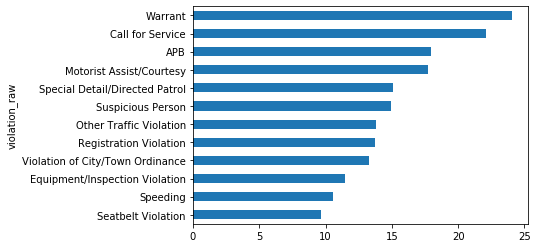

In [156]:
# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind='barh')

### Analyzing the effect of weather on policing

#### Initial Inspection of Data

In [157]:
weather.head(2)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


AWND - Average Wind Speed in mph <br>
WSF2 - Fastest Wind speed in any 2 minute period

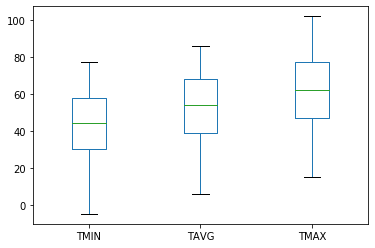

In [158]:
# Create a box plot of the temperature columns
weather[['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

In [159]:
# Create a 'TDIFF' column that represents temperature difference
weather['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


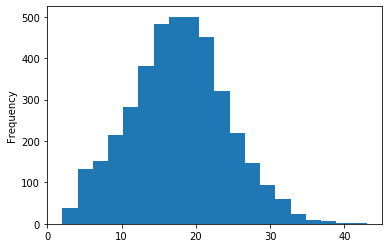

In [160]:
# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins=20)

- The TDIFF column has no negative values and its distribution is approximately normal, both of which are signs that the data is trustworthy.

#### Categorizing the weather


The weather DataFrame contains 20 columns that start with 'WT', each of which represents a bad weather condition. For example: <br><br>

WT05 indicates "Hail"<br>
WT11 indicates "High or damaging winds"<br>
WT17 indicates "Freezing rain"

In [161]:
weather.head(2)

,STATION,DATE,TAVG,TMIN,TMAX,AWND,WSF2,WT01,WT02,WT03,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,TDIFF
0,USW00014765,2005-01-01,44.0,35,53,8.95,25.1,1.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18
1,USW00014765,2005-01-02,36.0,28,44,9.40,14.1,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,16


In [166]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01':'WT22']
WT.head(2)

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN


In [170]:
# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

In [171]:
# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

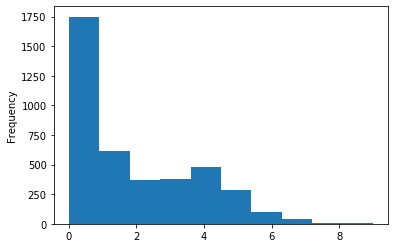

In [172]:
# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

It looks like many days didn't have any bad weather conditions, and only a small portion of days had more than four bad weather conditions.

#### Rating the weather conditions

In this exercise, you'll use the counts to create a rating system for the weather. <br><br>

The counts range from 0 to 9, and should be converted to ratings as follows:<br><br>

Convert 0 to 'good'<br>
Convert 1 through 4 to 'bad'<br>
Convert 5 through 9 to 'worse'<br>

In [173]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64


In [182]:
# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

In [183]:
# Count the unique values in 'rating'
weather.rating.value_counts()

bad      1836
good     1749
worse     432
Name: rating, dtype: int64

#### Categorical DataTyoe( + Logical Ordered)

- Logical Ordering enables us to use Conditionds for filtering

In [185]:
from pandas.api.types import CategoricalDtype

In [186]:
# Create a list of weather ratings in logical order
cats = ['good', 'bad', 'worse']
# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(CategoricalDtype(categories=cats , ordered = True))

In [187]:
# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]


#### Merging DataSets

Moving Index to a Column

In [188]:
# Reset the index of 'ri'
police_traffic_stops.reset_index(inplace=True)
police_traffic_stops.head()

,stop_datetime,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
1,2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8
2,2005-02-17 04:15:00,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8
3,2005-02-20 17:15:00,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,False,23
4,2005-02-24 01:20:00,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,False,8


In [190]:
# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]
weather_rating.head()

,DATE,rating
0,2005-01-01,bad
1,2005-01-02,bad
2,2005-01-03,bad
3,2005-01-04,bad
4,2005-01-05,bad


In [191]:
# Merge 'ri' and 'weather_rating' using a left join
police_weather = pd.merge(left=police_traffic_stops,
                          right=weather_rating, 
                          left_on='stop_date', 
                          right_on='DATE', 
                          how='left')

# Set 'stop_datetime' as the index of 'ri_weather'
police_weather.set_index('stop_datetime', inplace=True)

#### Does weather affect the arrest rate?


In [194]:
police_weather.head(2)

,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,frisk,stop_minutes,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,
2005-01-04 12:55:00,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,False,8,2005-01-04,bad
2005-01-23 23:15:00,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,False,8,2005-01-23,worse


In [195]:
police_weather.groupby(['violation', 'rating'])['is_arrested'].mean()

violation            rating
Equipment            good      0.059007
                     bad       0.066311
                     worse     0.097357
Moving violation     good      0.056227
                     bad       0.058050
                     worse     0.065860
Other                good      0.076966
                     bad       0.087443
                     worse     0.062893
Registration/plates  good      0.081574
                     bad       0.098160
                     worse     0.115625
Seat belt            good      0.028587
                     bad       0.022493
                     worse     0.000000
Speeding             good      0.013405
                     bad       0.013314
                     worse     0.016886
Name: is_arrested, dtype: float64

The arrest rate increases as the weather gets worse, and that trend persists across many of the violation types. This doesn't prove a causal link, but it's quite an interesting result!

In [204]:
arrest_rate = police_weather.groupby(['violation', 'rating'])['is_arrested'].mean()

In [198]:
# Print the arrest rate for moving violations in bad weather
print(arrest_rate.loc['Moving violation', 'bad'])

0.05804964058049641


In [200]:
# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

rating
good     0.013405
bad      0.013314
worse    0.016886
Name: is_arrested, dtype: float64


In [201]:
arrest_rate.unstack()

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


In [206]:
# Create the same DataFrame using a pivot table
police_weather.pivot_table(index='violation', columns='rating', values='is_arrested')

rating,good,bad,worse
violation,,,
Equipment,0.059007,0.066311,0.097357
Moving violation,0.056227,0.058050,0.065860
Other,0.076966,0.087443,0.062893
Registration/plates,0.081574,0.098160,0.115625
Seat belt,0.028587,0.022493,0.000000
Speeding,0.013405,0.013314,0.016886


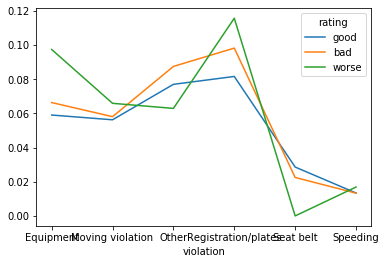

In [207]:
arrest_rate.unstack().plot()

# School Budgeting with Machine Learning in Python

<b> GOAL </b> :  <br>
Multi-class-multi-label classification problem , because there are 9 broad categories that each take on many possible sub-label instances.

## Importing Data

In [251]:
import pandas as pd
df = pd.read_csv('datasets/School/TrainingData.csv', index_col = 0)

In [253]:
df = df.reset_index()

In [254]:
df.head(2)

,index,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.81,KINDERGARTEN,General Fund,NaN
1,206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.86,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES


<b> FTE: </b>  Stands for "full-time equivalent". If the budget item is associated to an employee, this number tells us the percentage of full-time that the employee works. A value of 1 means the associated employee works for the school full-time. A value close to 0 means the item is associated to a part-time or contracted employee.
<br><br>
<b> Total: </b> Stands for the total cost of the expenditure. This number tells us how much the budget item cost.

In [360]:
df.describe()

,FTE,Total
count,126071.000000,3.957220e+05
mean,0.426794,1.310586e+04
std,0.573576,3.682254e+05
min,-0.087551,-8.746631e+07
25%,0.000792,7.379770e+01
50%,0.130927,4.612300e+02
75%,1.000000,3.652662e+03
max,46.800000,1.297000e+08


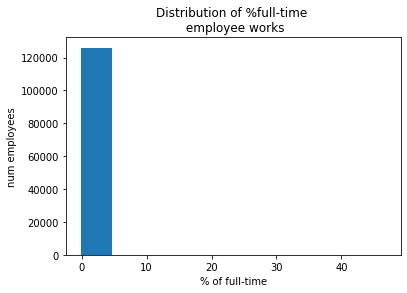

In [361]:
# Create the histogram
plt.hist(df['FTE'].dropna())
# Add title and labels
_=plt.title('Distribution of %full-time \n employee works')
_=plt.xlabel('% of full-time')
_=plt.ylabel('num employees')

In [362]:
df.columns

Index(['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type',
       'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status',
       'Object_Description', 'Text_2', 'SubFund_Description',
       'Job_Title_Description', 'Text_3', 'Text_4', 'Sub_Object_Description',
       'Location_Description', 'FTE', 'Function_Description',
       'Facility_or_Department', 'Position_Extra', 'Total',
       'Program_Description', 'Fund_Description', 'Text_1'],
      dtype='object')

## Changing Columns into Categorical Data

In [255]:
# Define the lambda function: categorize_label
categorize_label = lambda x: x.astype('category')

In [256]:
#Categorical Columns
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type', 'Pre_K', 'Operating_Status']

In [257]:
# Convert df[LABELS] to a categorical type
df[LABELS] = df[LABELS].apply(categorize_label, axis=0)

# Print the converted dtypes
print(df[LABELS].dtypes)

Function            category
Use                 category
Sharing             category
Reporting           category
Student_Type        category
Position_Type       category
Object_Type         category
Pre_K               category
Operating_Status    category
dtype: object


Text(0, 0.5, 'Number of unique values')

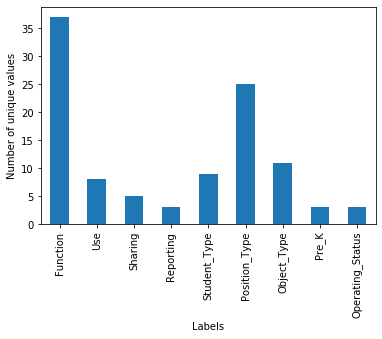

In [258]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

## Loss-Function (Log-Loss)

- Accuracy can be a bad measure when classes are imbalanced

- Log-Loss should be as small as possible

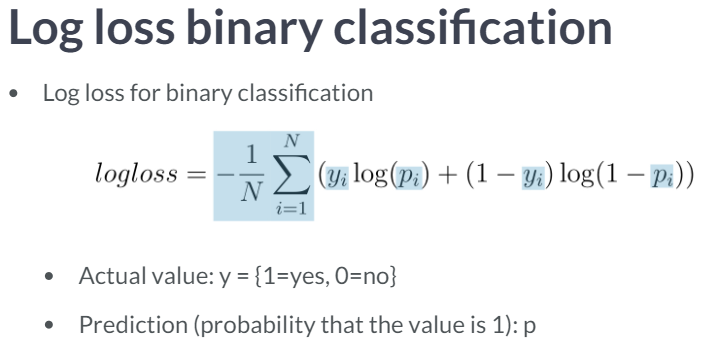

In [5]:
def compute_log_loss(predicted, actual, eps=1e-14):
    """Compute the logarithmic loss between predicted and
       actual when these are 1D arrays

       :param predicted: The predicted probabilties as floats between 0-1
       :param actual: The actual binary labels. Either 0 or 1
       :param eps (optional): log(0) is inf, so we need to offset our
                               predicted values slightly by eps from 0 or 1.
    """
    predicted = np.clip(predicted, eps, 1-eps)
    loss = -1 * np.mean(actual * np.log(predicted) + (1 - actual) * np.log(1 - predicted))
    return loss

In [6]:
correct_not_confident = np.array([0.65, 0.65, 0.65, 0.65, 0.65, 0.35, 0.35, 0.35, 0.35, 0.35])
correct_confident = np.array([0.95, 0.95, 0.95, 0.95, 0.95, 0.05, 0.05, 0.05, 0.05, 0.05])
wrong_not_confident = np.array([0.35, 0.35, 0.35, 0.35, 0.35, 0.65, 0.65, 0.65, 0.65, 0.65])
wrong_confident = np.array([0.05, 0.05, 0.05, 0.05, 0.05, 0.95, 0.95, 0.95, 0.95, 0.95])
actual_labels = np.array([1., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

In [7]:
# Compute and print log loss for 1st case
correct_confident_loss = compute_log_loss(correct_confident, actual_labels)
print("Log loss, correct and confident: {}".format(correct_confident_loss)) 

# Compute log loss for 2nd case
correct_not_confident_loss = compute_log_loss(correct_not_confident, actual_labels)
print("Log loss, correct and not confident: {}".format(correct_not_confident_loss)) 

# Compute and print log loss for 3rd case
wrong_not_confident_loss = compute_log_loss(wrong_not_confident, actual_labels)
print("Log loss, wrong and not confident: {}".format(wrong_not_confident_loss)) 

# Compute and print log loss for 4th case
wrong_confident_loss = compute_log_loss(wrong_confident, actual_labels)
print("Log loss, wrong and confident: {}".format(wrong_confident_loss)) 

# Compute and print log loss for actual labels
actual_labels_loss = compute_log_loss(actual_labels, actual_labels)
print("Log loss, actual labels: {}".format(actual_labels_loss)) 


Log loss, correct and confident: 0.05129329438755058
Log loss, correct and not confident: 0.4307829160924542
Log loss, wrong and not confident: 1.049822124498678
Log loss, wrong and confident: 2.9957322735539904
Log loss, actual labels: 9.99200722162646e-15


- Log loss penalizes highly confident wrong answers much more than any other type. This will be a good metric to use on your models

## Test-Train Split (Stratified Split with Multiple Target Variables)

- Some labels don't occur very often, but we want to make sure that they appear in both the training and the test sets. We provide a function that will make sure at least min_count examples of each label appear in each split: multilabel_train_test_split.

In [8]:
from warnings import warn
import numpy as np
import pandas as pd

In [107]:
def multilabel_sample_dataframe(df, labels, size, min_count=5, seed=None):
    """ Takes a dataframe `df` and returns a sample of size `size` where all
        classes in the binary matrix `labels` are represented at
        least `min_count` times.
    """
    idxs = multilabel_sample(labels, size=size, min_count=min_count, seed=seed)
    return df.loc[idxs]
def multilabel_sample(y, size=1000, min_count=5, seed=None):
    """ Takes a matrix of binary labels `y` and returns
        the indices for a sample of size `size` if
        `size` > 1 or `size` * len(y) if size =< 1.
        The sample is guaranteed to have > `min_count` of
        each label.
    """
    try:
        if (np.unique(y).astype(int) != np.array([0, 1])).any():
            raise ValueError()
    except (TypeError, ValueError):
        raise ValueError('multilabel_sample only works with binary indicator matrices')

    if (y.sum(axis=0) < min_count).any():
        raise ValueError('Some classes do not have enough examples. Change min_count if necessary.')

    if size <= 1:
        size = np.floor(y.shape[0] * size)

    if y.shape[1] * min_count > size:
        msg = "Size less than number of columns * min_count, returning {} items instead of {}."
        warn(msg.format(y.shape[1] * min_count, size))
        size = y.shape[1] * min_count

    rng = np.random.RandomState(seed if seed is not None else np.random.randint(1))

    if isinstance(y, pd.DataFrame):
        choices = y.index
        y = y.values
    else:
        choices = np.arange(y.shape[0])

    sample_idxs = np.array([], dtype=choices.dtype)

    # first, guarantee > min_count of each label
    for j in range(y.shape[1]):
        label_choices = choices[y[:, j] == 1]
        label_idxs_sampled = rng.choice(label_choices, size=min_count, replace=False)
        sample_idxs = np.concatenate([label_idxs_sampled, sample_idxs])

    sample_idxs = np.unique(sample_idxs)

    # now that we have at least min_count of each, we can just random sample
    sample_count = int(size - sample_idxs.shape[0])

    # get sample_count indices from remaining choices
    remaining_choices = np.setdiff1d(choices, sample_idxs)
    remaining_sampled = rng.choice(remaining_choices,
                                   size=sample_count,
                                   replace=False)

    return np.concatenate([sample_idxs, remaining_sampled])

In [108]:
def multilabel_train_test_split(X, Y, size, min_count=5, seed=None):
    """ Takes a features matrix `X` and a label matrix `Y` and
        returns (X_train, X_test, Y_train, Y_test) where all
        classes in Y are represented at least `min_count` times.
    """
    index = Y.index if isinstance(Y, pd.DataFrame) else np.arange(Y.shape[0])

    test_set_idxs = multilabel_sample(Y, size=size, min_count=min_count, seed=seed)
    train_set_idxs = np.setdiff1d(index, test_set_idxs)

    test_set_mask = index.isin(test_set_idxs)
    train_set_mask = ~test_set_mask

    return (X[train_set_mask], X[test_set_mask], Y[train_set_mask], Y[test_set_mask])

In [11]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [458]:
# Create the new DataFrame: numeric_data_only
numeric_data_only = df[NUMERIC_COLUMNS].fillna(-1000).copy() 
#-1000 to make sure model makes different preecitions  for NaN and 0's

# Get labels and convert to dummy variables: label_dummies
label_dummies = pd.get_dummies(df[LABELS])

In [459]:
df[LABELS].head(2)

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating


In [460]:
numeric_data_only.head(3)

,FTE,Total
134338,1.0,50471.81
206341,-1000.0,3477.86
326408,1.0,62237.13


In [461]:
# Create training and test sets
X_train, X_test, y_train, y_test = multilabel_train_test_split(numeric_data_only,
                                                               label_dummies,
                                                               size=0.2, 
                                                               seed=123)

# Print the info
print("X_train info:")
print(X_train.info())
print("\nX_test info:")  
print(X_test.info())
print("\ny_train info:")  
print(y_train.info())
print("\ny_test info:")  
print(y_test.info())

X_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   FTE     320222 non-null  float64
 1   Total   320222 non-null  float64
dtypes: float64(2)
memory usage: 7.3 MB
None

X_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FTE     80055 non-null  float64
 1   Total   80055 non-null  float64
dtypes: float64(2)
memory usage: 1.8 MB
None

y_train info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 320222 entries, 134338 to 415831
Columns: 104 entries, Function_Aides Compensation to Operating_Status_PreK-12 Operating
dtypes: uint8(104)
memory usage: 34.2 MB
None

y_test info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 80055 entries, 206341 to 72072
Columns: 104 entries, Funct

In [563]:
y_test.shape

(80055, 104)

In [462]:
y_train.head(2)

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
134338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
326408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [463]:
y_train['Function_Aides Compensation'].value_counts(normalize=True) 

0    0.950616
1    0.049384
Name: Function_Aides Compensation, dtype: float64

In [464]:
y_test['Function_Aides Compensation'].value_counts(normalize=True)

0    0.949485
1    0.050515
Name: Function_Aides Compensation, dtype: float64

## Basic Model

<b> Logisitic Regression for Multiple Classes </b>:
- OneVsRestClassifier <br>
<b> OneVsRestClassifier(LogisticRegression()) </b>

- Multi Class Logisitc Regression

In [12]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

In [466]:
# Instantiate the classifier: clf
clf = OneVsRestClassifier(LogisticRegression())

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Print the accuracy
print("Accuracy: {}".format(clf.score(X_test, y_test)))

Accuracy: 0.0


## HoldOut Data

In [524]:
hold_out = pd.read_csv('datasets/School/holdout.csv', index_col=0)
hold_out_2 = pd.read_csv('datasets/School/holdout_2.csv', index_col=0)

C:\Users\Ashwin\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [560]:
hold_out = pd.read_csv('datasets/School/TestData.csv', index_col=0)
hold_out.head(5)

C:\Users\Ashwin\Miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (5,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,FTE,Function_Description,Position_Extra,Text_4,Total,Text_2,Text_3,Fund_Description,Text_1
180042,Student Meals/Room/Other,Basic Educational Services,NaN,NaN,NaN,Line Item that is paid with Campus' money,School,NaN,Instruction,NaN,NaN,3999.910000,NaN,NaN,General Fund,NaN
28872,Extra Duty/Signing Bonus Pay,Undistributed,NaN,CHEERLEADER DIR,NaN,General,School,NaN,Cocurricular & Extra Curricular Activities,NaN,NaN,3447.320213,NaN,NaN,General Fund,NaN
186915,Professional Salaries,Bilingual Education,NaN,T-EL 1ST BIL,NaN,General,School,1.0,Instruction,NaN,NaN,52738.780869,NaN,NaN,General Fund,NaN
412396,Professional Salaries,Bilingual Education,NaN,T-EL 2ND BIL,NaN,General,School,1.0,Instruction,NaN,NaN,69729.263191,NaN,NaN,General Fund,NaN
427740,Salaries for Support Personnel,Undistributed,NaN,CLERK III- SCH,NaN,General,School,1.0,School Leadership,NaN,NaN,29492.834215,NaN,NaN,General Fund,NaN


In [558]:
prediction_df.head(2)

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
180042,0.035880,0.006467,0.000829,0.023908,0.008908,0.000168,0.032084,0.024416,0.052087,0.000059,...,0.010729,0.032092,0.116174,0.017361,0.831261,0.140982,0.027741,0.169539,0.019906,0.810791
28872,0.035881,0.006466,0.000829,0.023909,0.008908,0.000168,0.032085,0.024416,0.052087,0.000059,...,0.010729,0.032520,0.116175,0.017362,0.831252,0.141006,0.027741,0.169528,0.019906,0.810643


In [516]:
hold_out.head(2)

,Object_Description,Program_Description,SubFund_Description,Job_Title_Description,Facility_or_Department,Sub_Object_Description,Location_Description,FTE,Function_Description,Position_Extra,Text_4,Total,Text_2,Text_3,Fund_Description,Text_1
180042,Student Meals/Room/Other,Basic Educational Services,NaN,NaN,NaN,Line Item that is paid with Campus' money,School,NaN,Instruction,NaN,NaN,3999.910000,NaN,NaN,General Fund,NaN
28872,Extra Duty/Signing Bonus Pay,Undistributed,NaN,CHEERLEADER DIR,NaN,General,School,NaN,Cocurricular & Extra Curricular Activities,NaN,NaN,3447.320213,NaN,NaN,General Fund,NaN


In [517]:
NUMERIC_COLUMNS = ['FTE', 'Total']

In [573]:
predictions = clf.predict_proba(X_test.fillna(-1000))

In [576]:
y_test.to_csv('datasets/School/HOLDOUT.csv')

## Making Preedictions on Hold-Out Data

In [569]:
BOX_PLOTS_COLUMN_INDICES = [range(0, 37),
 range(37, 48),
 range(48, 51),
 range(51, 76),
 range(76, 79),
 range(79, 82),
 range(82, 87),
 range(87, 96),
 range(96, 104)]

In [570]:
def _multi_multi_log_loss(predicted,
                          actual,
                          class_column_indices=BOX_PLOTS_COLUMN_INDICES,
                          eps=1e-15):
    """ Multi class version of Logarithmic Loss metric as implemented on
    DrivenData.org
    """
    class_scores = np.ones(len(class_column_indices), dtype=np.float64)
    
    # calculate log loss for each set of columns that belong to a class:
    for k, this_class_indices in enumerate(class_column_indices):
        # get just the columns for this class
        preds_k = predicted[:, this_class_indices].astype(np.float64)
        
        # normalize so probabilities sum to one (unless sum is zero, then we clip)
        preds_k /= np.clip(preds_k.sum(axis=1).reshape(-1, 1), eps, np.inf)

        actual_k = actual[:, this_class_indices]

        # shrink predictions so
        y_hats = np.clip(preds_k, eps, 1 - eps)
        sum_logs = np.sum(actual_k * np.log(y_hats))
        class_scores[k] = (-1.0 / actual.shape[0]) * sum_logs
        
    return np.average(class_scores)

In [597]:
def score_submission(pred_path='datasets/School/predictions.csv', holdout_path='datasets/School/HOLDOUT.csv'):
    # this happens on the backend to get the score
   # holdout_labels = pd.get_dummies(
      #  pd.read_csv(holdout_path, index_col=0)
      #  .apply(lambda x: x.astype('category'), axis=0)
   # )
    
    preds = pd.read_csv(pred_path, index_col=0)
    holdout = pd.read_csv(holdout_path, index_col=0)
    # make sure that format is correct
    #assert (preds.columns == holdout_labels.columns).all()
   # assert (preds.index == holdout_labels.index).all()
    
    return _multi_multi_log_loss(preds.values, holdout.values)

In [593]:
# Format predictions in DataFrame: prediction_df
prediction_df = pd.DataFrame(columns=pd.get_dummies(df[LABELS]).columns,
                             
                             data=predictions)
# Save prediction_df to csv
prediction_df.to_csv('datasets/School/predictions.csv')

In [598]:
# Submit the predictions for scoring: score
score = score_submission(pred_path='datasets/School/predictions.csv',holdout_path='datasets/School/HOLDOUT.csv')
# Print score
print('Your model, trained with numeric data only, yields logloss score: {}'.format(score))

Your model, trained with numeric data only, yields logloss score: 1.8345949916152047


## Natural Language Processing

### Example for 1 Test Column

<b> TOKENIZATION :</b>
     - Splitting Strings into Segments
<b> BAGE OF WORDS :</b>
     - Counting the number of times a token appears
     - Cons: WOrd Order is not considered
 <b> N-GRAMS :</b>
     - 1-gram(bag-of-words), 2-gram, 3-gram, etc.,

``` python
Scikit Learn Bag-Of-Words:
    
from sklearn.feature_extraction.text import CountVectorizer
tokenpattern = ''  #R.E.
vec = CountVectorizer(token_pattern=tokenpattern)
vec_alphanumeric.fit(df['Text_Column'])

vec.get_feature_names()   #Dictionary List
len(vec.get_feature_names()) # Length of Dictionary
```

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
#RE to split on any white space

In [608]:
df[['Position_Extra']].tail()

,Position_Extra
109283,NaN
102430,PROFESSIONAL-INSTRUCTIONAL
413949,PARENT/TITLE I
433672,OFFICE/ADMINISTRATIVE SUPPORT
415831,CERTIFIED SUBSTITUTE


In [611]:
# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [612]:
# Fill missing values in df.Position_Extra
df.Position_Extra.fillna('', inplace=True)

# Instantiate the CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)

# Fit to the data
vec_alphanumeric.fit(df.Position_Extra)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='[A-Za-z0-9]+(?=\\s+)',
                tokenizer=None, vocabulary=None)

In [615]:
# Print the number of tokens and first 15 tokens
msg = "There are {} tokens in Position_Extra if we split on non-alpha numeric"
print(msg.format(len(vec_alphanumeric.get_feature_names())))
print(vec_alphanumeric.get_feature_names()[:15])

There are 385 tokens in Position_Extra if we split on non-alpha numeric
['1st', '2nd', '3rd', '4th', '56', '5th', '9th', 'a', 'ab', 'accountability', 'adaptive', 'addit', 'additional', 'adm', 'admin']


### For all Text Columns

In order to get a bag-of-words representation for all of the text data in our DataFrame, you must first convert the text data in each row of the DataFrame into a single string.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)

In [29]:
# Create the text vector
text_vector = combine_text_columns(df)

In [32]:
text_vector

134338       Teacher-Elementary        KINDERGARTEN  KIN...
206341    CONTRACTOR SERVICES BOND EXPENDITURES BUILDING...
326408    Personal Services - Teachers   TCHER 2ND GRADE...
364634    EMPLOYEE BENEFITS TEACHER SUBS GENERAL FUND Te...
47683     TEACHER COVERAGE FOR TEACHER TEACHER SUBS GENE...
                                ...                        
109283    WORKSHOP PARTICIPANT             CURRICULUM RE...
102430    SALARIES OF PART TIME EMPLOYEE  FEDERAL GDPG F...
413949       School Liaison       PARENT/TITLE I Misc Sc...
433672    EMPLOYEE BENEFITS EDUCATIONAL RESOURCE SERVICE...
415831    Salaries And Wages For Substitute Professional...
Length: 400277, dtype: object

In [33]:
# Create the basic token pattern(split by space)
TOKENS_BASIC = '\\S+(?=\\s+)'
# Instantiate basic CountVectorizer: vec_basic
vec_basic = CountVectorizer(token_pattern=TOKENS_BASIC)

# Fit and transform vec_basic
vec_basic.fit_transform(text_vector)
# Print number of tokens of vec_basic
print("There are {} tokens in the dataset".format(len(vec_basic.get_feature_names())))

There are 4757 tokens in the dataset


In [34]:
# Create the alphanumeric token pattern
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
# Instantiate alphanumeric CountVectorizer: vec_alphanumeric
vec_alphanumeric = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)
# Fit and transform vec_alphanumeric
vec_alphanumeric.fit_transform(text_vector)
# Print number of tokens of vec_alphanumeric
print("There are {} alpha-numeric tokens in the dataset".format(len(vec_alphanumeric.get_feature_names())))

There are 3284 alpha-numeric tokens in the dataset


### NLP TRICKS - Model Improvement

- Tokenize on <b> PUNCTUATION MARKS </b> to avoid hyphens, underscores, etc.,

In [ ]:
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'
from sklearn.feature_extraction.text import CountVectorizer

# Create the text vector
text_vector = combine_text_columns(X_train)

text_features = CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC)
text_features.fit(text_vector)

- Using N-Grams

In [ ]:
CountVectorizer(token_pattern=TOKENS_ALPHANUMERIC, ngram_range=(1, 2))  #Ssing Both 1-grams & 2-Grams

### INTERACTION TERMS  !!!!

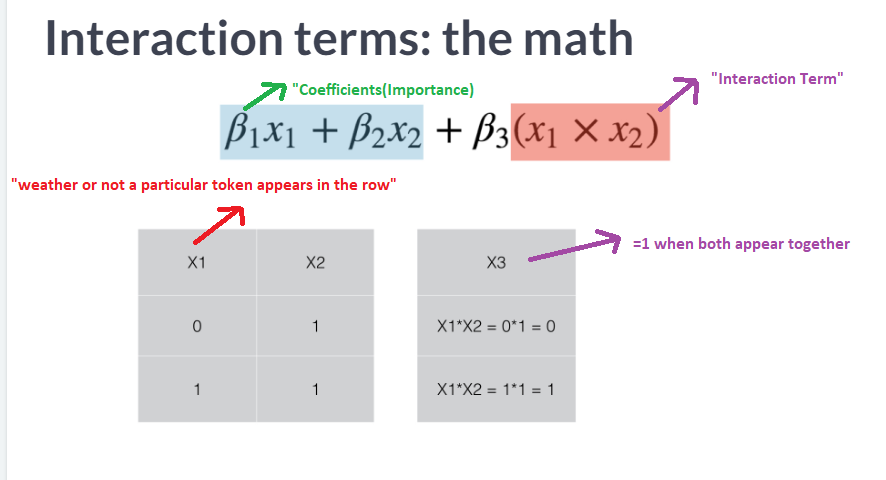

<b> NOTE </b>: Not compatible with sparse matrices <br>
<b> NOTE </b>: CountVectorizer() Outputs sparse Matrix <br>
<b> Thus Convert </b>

``` python
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,   #Degree = 2
                         interaction_only = True  #SO that we do not multpiply column by itself
                         include_bias = False/True) #Bias Term
poly.fit_transform(X)
```

In [387]:
C = np.array([[1,0],[0,1]])
print(C)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias = False)
CC = poly.fit_transform(C)
CC

[[1 0]
 [0 1]]


array([[1., 0., 0.],
       [0., 1., 0.]])

#### WORKING WITH SPARSE MATRICES

In [390]:
from itertools import combinations

import numpy as np
from scipy import sparse
from sklearn.base import BaseEstimator, TransformerMixin


class SparseInteractions(BaseEstimator, TransformerMixin):
    def __init__(self, degree=2, feature_name_separator="_"):
        self.degree = degree
        self.feature_name_separator = feature_name_separator

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not sparse.isspmatrix_csc(X):
            X = sparse.csc_matrix(X)

        if hasattr(X, "columns"):
            self.orig_col_names = X.columns
        else:
            self.orig_col_names = np.array([str(i) for i in range(X.shape[1])])

        spi = self._create_sparse_interactions(X)
        return spi

    def get_feature_names(self):
        return self.feature_names

    def _create_sparse_interactions(self, X):
        out_mat = []
        self.feature_names = self.orig_col_names.tolist()

        for sub_degree in range(2, self.degree + 1):
            for col_ixs in combinations(range(X.shape[1]), sub_degree):
                # add name for new column
                name = self.feature_name_separator.join(self.orig_col_names[list(col_ixs)])
                self.feature_names.append(name)

                # get column multiplications value
                out = X[:, col_ixs[0]]
                for j in col_ixs[1:]:
                    out = out.multiply(X[:, j])

                out_mat.append(out)

        return sparse.hstack([X] + out_mat)

In [ ]:
SparseInteractions(degree=2)  #Take Sparse Matrices for fit_transform

## PipeLines

### Basic Setup

``` python
pl = Pipeline([
               ('name_of_pipe_object' , Transformer() )  ])

#Fitting Model
pl.fit(X_train, y_train) 


#PREDICTION
pl.predict_proba(X_test)     #prediction probabilities


#Model Performance:

pl.score(X_test, y_test)   #eg: for Logistic Regression default score is accuracy
```

<b> Imputation: </b>

- Filling NaN values with strategies (eg: Mean Imputation, etc.,)

``` python
from sklearn.preprocessing import Imputer #Default = Mean Imputation
 pl=Pipeline([
            ('imputer' , Imputer()),
            ('Classifier' , LogisitcRegresion())
 ])
```

### Text Data In a Pipeline   (Feature Union)

How to handle text and numeric data in a pipeline seperatly ?
- Build two seperate pipelines for text and numeric data
- FunctionTransformer()
- FeatureUnion()

<b> FUNCTION FRANSFORMER: </b>
- Turns a Python Function into an object that scikit-learn pipeline can understand

eg: Getting Text columns from a dataset

``` python
from sklearn.preprocessing import FunctionTransformer

get_text_data = FunctionTransformer( function_to_get_text_columns ,validate = False)
#alidate=False --->
#Makes sure that scikitlearn dosent check for NaN's or validate d-types of Input (We do it ourselves)

get_text_data = FunctionTransformer( lambda x: x['text_column'] ,validate = False)

get_numeric_data = FunctionTransformer( lambda x: x['num_column'] ,validate = False)

# Fit and transform the text data: 
just_text_data = get_text_data.fit_transform(df)

```

- Now we have two array generating functions (Text array and Numeric Array)

<b> FEATURE UNION: </b>

- Combining arrays

``` python
from sklearn.pipeline import FeatureUnion

union = FeatureUnion ([
     ('numeric' , numeric_pipeline )
     ('text' , text_pipeline)
])
```

<b> Example-2 : </b>

``` python
# Create a FeatureUnion with nested pipeline: 
process_and_join_features = FeatureUnion(
            transformer_list = [
                
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer(missing_values=np.nan , strategy='mean'))
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
                            ]
                                     )

# Instantiate nested pipeline: 
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])
```

<b> SETTING UP PIPELINE </b>

``` python
numeric_pipeline = Pipeline([
                            ('selector' , get_numeric_data) ,
                            ('imputer' , Imputer())
                           ])
text_pipeline = Pipeline([
                            ('selector' , get_text_data) ,
                            ('vectorizer' , CountVectorizer())
                           ])
pl = Pipiline([
              ('union' , FeatureUnion ([
                                      ('numeric' , numeric_pipeline )
                                      ('text' , text_pipeline)
                                      ]) ) ,
             ('clf', Classifier())

            ])

```

### SETTING UP FINAL PIEPLINE

Text(0, 0.5, 'Number of unique values')

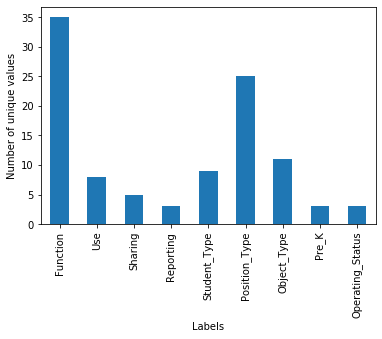

In [227]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = df[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

In [259]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit

In [273]:
msss = MultilabelStratifiedShuffleSplit(n_splits=1 , test_size=0.25, random_state=0)

In [292]:
df = df.iloc[0:2000,:]

In [293]:
# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

In [294]:
TEST = df.loc[pd.DataFrame(msss.split(df[NON_LABELS],dummy_labels))[1][0],:]
TRAIN = df.loc[pd.DataFrame(msss.split(df[NON_LABELS],dummy_labels))[0][0],:]

In [295]:
X_train=TRAIN[NON_LABELS]
y_train= pd.get_dummies(TRAIN[LABELS])
X_test=TEST[NON_LABELS]
y_test= pd.get_dummies(TEST[LABELS])

In [340]:
X_train.head(2)

,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
0,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.81,KINDERGARTEN,General Fund,NaN
1,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.86,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES


Text(0, 0.5, 'Number of unique values')

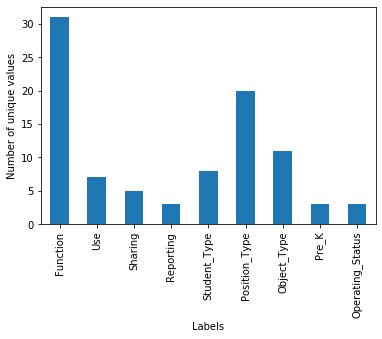

In [299]:
# Calculate number of unique values for each label: num_unique_labels
num_unique_labels = TEST[LABELS].apply(pd.Series.nunique)

# Plot number of unique values for each label
num_unique_labels.plot(kind='bar')
plt.xlabel('Labels')
plt.ylabel('Number of unique values')

In [139]:
df.head(2)

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status,Object_Description,...,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating,NaN,...,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.81,KINDERGARTEN,General Fund,NaN
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating,CONTRACTOR SERVICES,...,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.86,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES


In [140]:
LABELS = ['Function', 'Use', 'Sharing', 'Reporting', 'Student_Type', 'Position_Type', 'Object_Type',
 'Pre_K', 'Operating_Status'] 
#Categorical COlumns

In [141]:
df[LABELS].head(2)

,Function,Use,Sharing,Reporting,Student_Type,Position_Type,Object_Type,Pre_K,Operating_Status
134338,Teacher Compensation,Instruction,School Reported,School,NO_LABEL,Teacher,NO_LABEL,NO_LABEL,PreK-12 Operating
206341,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,NO_LABEL,Non-Operating


In [249]:
# Get the dummy encoding of the labels
dummy_labels = pd.get_dummies(df[LABELS])

In [250]:
dummy_labels.head(2)

,Function_Aides Compensation,Function_Career & Academic Counseling,Function_Communications,Function_Curriculum Development,Function_Data Processing & Information Services,Function_Development & Fundraising,Function_Enrichment,Function_Extended Time & Tutoring,Function_Facilities & Maintenance,Function_Facilities Planning,...,Object_Type_Rent/Utilities,Object_Type_Substitute Compensation,Object_Type_Supplies/Materials,Object_Type_Travel & Conferences,Pre_K_NO_LABEL,Pre_K_Non PreK,Pre_K_PreK,Operating_Status_Non-Operating,"Operating_Status_Operating, Not PreK-12",Operating_Status_PreK-12 Operating
134338,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
206341,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [144]:
from sklearn.preprocessing import FunctionTransformer

In [145]:
# Get the columns that are features in the original df
NON_LABELS = [c for c in df.columns if c not in LABELS]

In [146]:
df.shape

(1500, 25)

In [127]:
df[NON_LABELS].head(2)  #Text Data- COlumns

,Object_Description,Text_2,SubFund_Description,Job_Title_Description,Text_3,Text_4,Sub_Object_Description,Location_Description,FTE,Function_Description,Facility_or_Department,Position_Extra,Total,Program_Description,Fund_Description,Text_1
134338,NaN,NaN,NaN,Teacher-Elementary,NaN,NaN,NaN,NaN,1.0,NaN,NaN,KINDERGARTEN,50471.81,KINDERGARTEN,General Fund,NaN
206341,CONTRACTOR SERVICES,BOND EXPENDITURES,BUILDING FUND,(blank),Regular,NaN,NaN,NaN,NaN,RGN GOB,NaN,UNDESIGNATED,3477.86,BUILDING IMPROVEMENT SERVICES,NaN,BUILDING IMPROVEMENT SERVICES


In [279]:
# Split into training and test sets
X_train1, X_test1, y_train1, y_test1 = multilabel_train_test_split(df[NON_LABELS],
                                                               dummy_labels,
                                                               0.2, 
                                                               seed=123)

In [55]:
def combine_text_columns(data_frame, to_drop=NUMERIC_COLUMNS + LABELS):
    """ converts all text in each row of data_frame to single vector """
    
    # Drop non-text columns that are in the df
    to_drop = set(to_drop) & set(data_frame.columns.tolist())
    text_data = data_frame.drop(to_drop, axis=1)
    
    # Replace nans with blanks
    text_data.fillna("", inplace=True)
    
    # Join all text items in a row that have a space in between
    return text_data.apply(lambda x: " ".join(x), axis=1)
#Combine All Text columns into a single column

In [300]:
# Preprocess the text data: get_text_data
get_text_data = FunctionTransformer(combine_text_columns, validate=False)

# Preprocess the numeric data: get_numeric_data
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

In [301]:
from sklearn.pipeline import Pipeline, FeatureUnion

In [302]:
from sklearn.impute import SimpleImputer

In [356]:
# Complete the pipeline: pl
pl = Pipeline([
              ('union', FeatureUnion(
                                    transformer_list = [
                                 ('numeric_features', Pipeline([
                                 ('selector', get_numeric_data),
                                 ('imputer', SimpleImputer(missing_values=np.nan , strategy='mean'))
                                                      ])),
                    ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', OneVsRestClassifier(LogisticRegression(max_iter=8000)))
    ])

In [357]:
# Fit to the training data
pl.fit(X_train, y_train)

C:\Users\Ashwin\Miniconda3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 2 is present in all training examples.
  str(classes[c]))
C:\Users\Ashwin\Miniconda3\lib\site-packages\sklearn\multiclass.py:75: UserWarning: Label not 9 is present in all training examples.
  str(classes[c]))


Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numeric_features',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  FunctionTransformer(accept_sparse=False,
                                                                                      check_inverse=True,
                                                                                      func=<function <lambda> at 0x000001B1B1C1DEE8>,
                                                                                      inv_kw_args=None,
                                                                                      inverse_func=None,
                                                                                      kw_args=None,
                                   

In [358]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.03592814371257485


<b> TRYING OUT A DIFFERENT MODEL </b>

In [359]:
# Import random forest classifer
from sklearn.ensemble import RandomForestClassifier
# Complete the pipeline: pl
pl = Pipeline([
              ('union', FeatureUnion(
                                    transformer_list = [
                                 ('numeric_features', Pipeline([
                                 ('selector', get_numeric_data),
                                 ('imputer', SimpleImputer(missing_values=np.nan , strategy='mean'))
                                                      ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
             ]
        )),
        ('clf', RandomForestClassifier())
    ])

In [360]:
# Fit to the training data
pl.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numeric_features',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  FunctionTransformer(accept_sparse=False,
                                                                                      check_inverse=True,
                                                                                      func=<function <lambda> at 0x000001B1B1C1DEE8>,
                                                                                      inv_kw_args=None,
                                                                                      inverse_func=None,
                                                                                      kw_args=None,
                                   

In [361]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.5508982035928144


## HASHING Technique (Feature hashing)

- By explicitly stating how many possible outputs the hashing function may have, we limit the size of the objects that need to be processed. With these limits known, computation can be made more efficient and we can get results faster, even on large datasets.

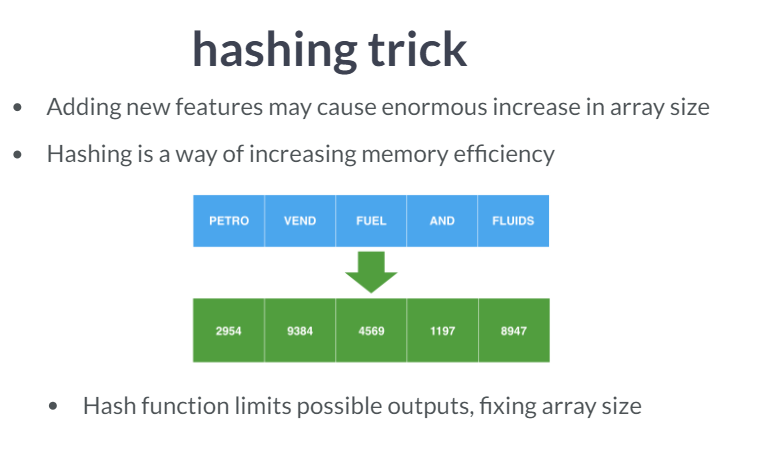

``` python
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(norm = none,  # make the HashingVectorizer perform similarly to the default settings on the CountVectorizer
                               non_negative=True,
                               token_pattern = TOKENS_ALPHANUMERIC,
                               ngram_range=(1,2),  
                               alternate_sign=False,
                               n_features=50)

vectorizer.fit_transform(DATA)

```

In [395]:
from sklearn.feature_extraction.text import HashingVectorizer
corpus = [ 'This is the first document.',  'This document is the second document.',
                 'And this is the third one.', 'Is this the first document?']

In [402]:
vectorizer = HashingVectorizer(n_features=2**4)
G = vectorizer.fit_transform(corpus)
print(type(G))
G.shape

<class 'scipy.sparse.csr.csr_matrix'>


(4, 16)

In [425]:
# Get text data: 
text_data = combine_text_columns(X_train)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)' 

# Instantiate the HashingVectorizer: hashing_vec
hashing_vec = HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC, 
                                binary=False,
                                ngram_range=(1, 2),
                               norm=None,
                               alternate_sign=False)

# Fit and transform the Hashing Vectorizer
hashed_text = hashing_vec.fit_transform(text_data)

# Create DataFrame and print the head
hashed_df = pd.DataFrame(hashed_text.data)
print(hashed_df.head())

     0
0  1.0
1  1.0
2  2.0
3 -1.0
4  1.0


In [424]:
hashed_df.shape

(43927, 1)

## Winning Model

 a dimensionality reduction technique, which is what the dim_red step does, and we have to scale the features to lie between -1 and 1, which is what the scale step does.

In [403]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import FunctionTransformer, MaxAbsScaler
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction.text import HashingVectorizer

<b> CHI-SQUARE TEST :</b> (Feature Selection) <br>
- SelectKBest()
- chi-squared test to select the K "best" features. <br>

<b> SCALING :</b>
- MaxAbsScaler() in order to squash the relevant features into the interval -1 to 1.

In [366]:
# Select 300 best features
chi_k = 300

# Perform preprocessing
get_text_data = FunctionTransformer(combine_text_columns, validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[NUMERIC_COLUMNS], validate=False)

# Create the token pattern: TOKENS_ALPHANUMERIC
TOKENS_ALPHANUMERIC = '[A-Za-z0-9]+(?=\\s+)'

In [437]:
# Instantiate pipeline: pl
pl = Pipeline([
        ('union', FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
                    ('imputer', SimpleImputer(missing_values=np.nan , strategy='mean'))
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', HashingVectorizer(token_pattern=TOKENS_ALPHANUMERIC,
                                                     alternate_sign=False, norm=None, binary=False,
                                                     ngram_range=(1, 2))),
                    ('dim_red', SelectKBest(chi2, chi_k))  #Feature Selection
                ]))
             ]
        )),
        ('int', SparseInteractions(degree=2)),   #INETRACTION TERMS
        ('scale', MaxAbsScaler()),
        ('clf', RandomForestClassifier())
    ])

In [438]:
pl.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('union',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('numeric_features',
                                                 Pipeline(memory=None,
                                                          steps=[('selector',
                                                                  FunctionTransformer(accept_sparse=False,
                                                                                      check_inverse=True,
                                                                                      func=<function <lambda> at 0x000001B1B1C94C18>,
                                                                                      inv_kw_args=None,
                                                                                      inverse_func=None,
                                                                                      kw_args=None,
                                   

In [439]:
# Compute and print accuracy
accuracy = pl.score(X_test, y_test)
print("\nAccuracy on budget dataset: ", accuracy)


Accuracy on budget dataset:  0.12974051896207583
